In [138]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

# Importing libraries for natural language processing
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
# Get regular expression library
import re

import warnings
from collections import Counter
import datetime
import wordcloud
import json

from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest,chi2
# import operator
from collections import defaultdict

In [139]:
us_vids = pd.read_csv('data/USvideos.csv')
in_vids = pd.read_csv('data/INvideos.csv')
ca_vids = pd.read_csv('data/CAvideos.csv')
gb_vids = pd.read_csv('data/GBvideos.csv')
# View sample
us_reviews.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,us
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",us
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,us
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,us
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,us


In [140]:
# Adding a column called country to each of the above datasets
us_vids['country'] = 'us'
in_vids['country'] = 'in'
ca_vids['country'] = 'ca'
gb_vids['country'] = 'gb'
# Viewing the data
us_vids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,us
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",us
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,us
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,us
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,us


In [141]:
print('Number of videos by nation are :')
print('US  = ' + str(us_vids.size))
print('India  = ' + str(in_vids.size))
print('Canada  = ' + str(ca_vids.size))
print('Great Britain  = ' + str(gb_vids.size))

frames = [us_vids,in_vids,ca_vids,gb_vids]
all_vids = pd.concat(frames)
print('Number of videos combined are :' + str(all_vids.size))

Number of videos by nation are :
US  = 696133
India  = 634984
Canada  = 694977
Great Britain  = 661572
Number of videos combined are :2687666


In [142]:
# view the all vid
# display(all_vids)
all_vids.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [143]:
# Data cleaning
for index,row in all_vids.iterrows():
    # Removing punctuation
    temp = row['description']
    temp = re.sub(r'http\S+', '', str(row['description']))
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(temp)
    all_vids.set_value(index,'description',' '.join(tokens))
#   Treating title of the videos
    tempTitle = row['title']
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(tempTitle)
    all_vids.set_value(index,'title',' '.join(tokens))

/Users/singhjasneet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/singhjasneet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [146]:
display(all_vids)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,John Lewis Christmas Ad 2017 MozTheMonster,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,Click here to continue the story and make your...,us
1,1ZAPwfrtAFY,17.14.11,Taylor Swift Ready for It Live SNL,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Musical guest Taylor Swift performs Ready for ...,us
2,5qpjK5DgCt4,17.14.11,Eminem Walk On Water Audio ft Beyoncé,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Eminem s new track Walk on Water ft Beyoncé is...,us
3,puqaWrEC7tY,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Salford drew 4 4 against the Class of 92 and F...,us
4,d380meD0W0M,17.14.11,Dashcam captures truck s near miss with child ...,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Dashcam captures truck s near miss with child ...,us
5,gHZ1Qz0KiKM,17.14.11,How My Relationship Started,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,HOW MY RELATIONSHIP STARTED n PB Merch n PB Me...,us
6,39idVpFF7NQ,17.14.11,Ed Sheeran Perfect Official Music Video,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,to Ed s channel Ed on nFacebook Website Jason ...,us
7,nc99ccSXST0,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD nPrevious Vlog C...,us
8,jr9QtXwC9vc,17.14.11,Elbow Golden Slumbers John Lewis Advert 2017,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,Golden Slumbers originally by The Beatles and ...,us
9,TUmyygCMMGA,17.14.11,Jennifer Lopez Amor Amor Amor Official Video f...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,Jennifer Lopez ft Wisin Amor Amor Amor Officia...,us


In [147]:
stemmer = SnowballStemmer(language="english", ignore_stopwords = True)
words = stopwords.words('english')
# Stemming the description
all_vids['cleaned_description'] = all_vids['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",str(x)).split() if i not in words]).lower())

# Stemming the title
all_vids['title'] = all_vids['title'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",str(x)).split() if i not in words]).lower())

In [151]:
display(all_vids.head())
# print(all_vids['title'][0])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,cleaned_description
0,2kyS6SvSYSE,17.14.11,john lewi christma ad mozthemonst,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,Click here to continue the story and make your...,us,click continu stori make monster n befriend no...
1,1ZAPwfrtAFY,17.14.11,taylor swift readi it live snl,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Musical guest Taylor Swift performs Ready for ...,us,music guest taylor swift perform readi it satu...
2,5qpjK5DgCt4,17.14.11,eminem walk on water audio ft beyonc,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Eminem s new track Walk on Water ft Beyoncé is...,us,eminem new track walk water ft beyonc avail ev...
3,puqaWrEC7tY,17.14.11,goal salford citi vs class friend the peninsul...,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Salford drew 4 4 against the Class of 92 and F...,us,salford drew class friend newli open the penin...
4,d380meD0W0M,17.14.11,dashcam captur truck near miss child norway,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Dashcam captures truck s near miss with child ...,us,dashcam captur truck near miss child norway nt...


Description - Uni and Bi-grams based on the TF-IDF Weight


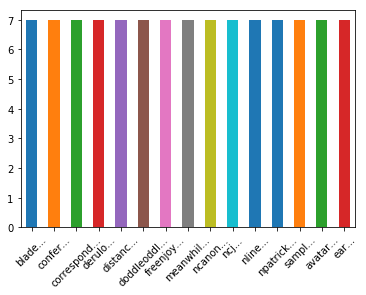

1-gram top: [['blade', 6.98704041737968], ['confer', 6.98704041737968], ['correspond', 6.98704041737968], ['derulo', 6.98704041737968], ['distanc', 6.98704041737968], ['doddleoddl', 6.98704041737968], ['freenjoy', 6.98704041737968], ['meanwhil', 6.98704041737968], ['ncanon', 6.98704041737968], ['ncj', 6.98704041737968], ['nline', 6.98704041737968], ['npatrick', 6.98704041737968], ['sampl', 6.98704041737968], ['avatar', 6.984524692782433], ['ear', 6.984524692782433]]


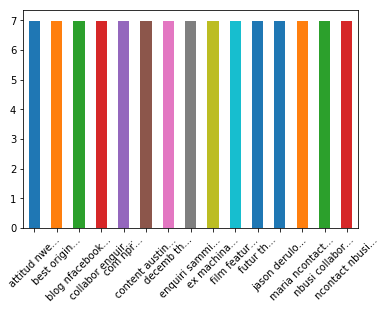

2-gram top: [['attitud nwe', 6.98704041737968], ['best origin', 6.98704041737968], ['blog nfacebook', 6.98704041737968], ['collabor enquiri', 6.98704041737968], ['com npr', 6.98704041737968], ['content austin', 6.98704041737968], ['decemb th', 6.98704041737968], ['enquiri sammi', 6.98704041737968], ['ex machina', 6.98704041737968], ['film featur', 6.98704041737968], ['futur th', 6.98704041737968], ['jason derulo', 6.98704041737968], ['maria ncontact', 6.98704041737968], ['nbusi collabor', 6.98704041737968], ['ncontact nbusi', 6.98704041737968]]


In [157]:
print('Description - Uni and Bi-grams based on the TF-IDF Weight')

index = ['Doc {:d}'.format(i) for i in range(len(all_vids['cleaned_description']))]
# Unigrams
# Create a bag of words using the frequency of words for unigram
vect = TfidfVectorizer(max_df=.5, stop_words='english', ngram_range=(1,2), min_df=0.0025)
X = vect.fit_transform(all_vids['cleaned_description']).todense()
features_by_gram = defaultdict(list)
for f, w in zip(vect.get_feature_names(), vect.idf_):
    features_by_gram[len(f.split(' '))].append([f, w])
    
top_n = 15
fig, ax = plt.subplots()
for gram, features in features_by_gram.items():
    top_features = sorted(features, key=lambda x: x[1], reverse=True)[:top_n]
    featuresDF = pd.DataFrame(top_features, columns=['feature','weight'])
    ax = featuresDF['weight'].plot.bar()
    labels = []
    for item in featuresDF['feature']:
        labels.append(item[:15] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    plt.show()
    print('{}-gram top:'.format(gram), top_features)

Title - Uni and Bi-grams based on the TF-IDF Weight


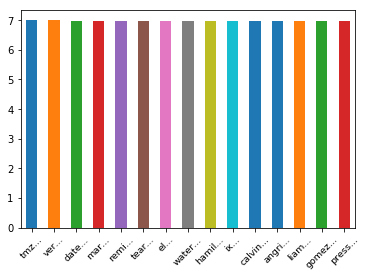

1-gram top: [['tmz', 6.984524692782433], ['ver', 6.984524692782433], ['date', 6.982015281177007], ['mar', 6.982015281177007], ['remi', 6.977015270760301], ['tear', 6.977015270760301], ['el', 6.974524609447849], ['water', 6.972040136120188], ['hamil', 6.967089630960332], ['ix', 6.967089630960332], ['calvin', 6.964623538465138], ['angri', 6.962163512624276], ['liam', 6.962163512624276], ['gomez', 6.9548195383685165], ['press', 6.949953348717344]]


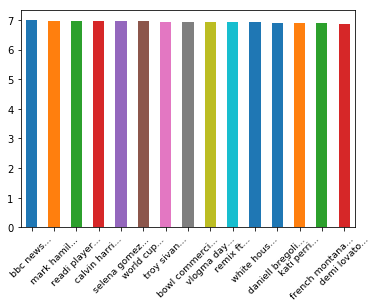

2-gram top: [['bbc news', 6.98704041737968], ['mark hamil', 6.967089630960332], ['readi player', 6.967089630960332], ['calvin harri', 6.964623538465138], ['selena gomez', 6.9548195383685165], ['world cup', 6.9548195383685165], ['troy sivan', 6.9426981778361725], ['bowl commerci', 6.918887529142453], ['vlogma day', 6.918887529142453], ['remix ft', 6.911853502485074], ['white hous', 6.911853502485074], ['daniell bregoli', 6.9071914893792625], ['kati perri', 6.90255110982276], ['french montana', 6.881931822620024], ['demi lovato', 6.868418103453301]]


In [154]:
print('Title - Uni and Bi-grams based on the TF-IDF Weight')

# index = ['Doc {:d}'.format(i) for i in range(len(all_vids['cleaned_description']))]
# Unigrams
# Create a bag of words using the frequency of words for unigram
vect = TfidfVectorizer(max_df=.1, stop_words='english', ngram_range=(1,2), min_df=0.0025)
X = vect.fit_transform(all_vids['title']).todense()
features_by_gram = defaultdict(list)
for f, w in zip(vect.get_feature_names(), vect.idf_):
    features_by_gram[len(f.split(' '))].append([f, w])
    
top_n = 15
fig, ax = plt.subplots()
for gram, features in features_by_gram.items():
    top_features = sorted(features, key=lambda x: x[1], reverse=True)[:top_n]
    featuresDF = pd.DataFrame(top_features, columns=['feature','weight'])
    ax = featuresDF['weight'].plot.bar()
    labels = []
    for item in featuresDF['feature']:
        labels.append(item[:15] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=9.5)
    plt.show()
    print('{}-gram top:'.format(gram), top_features)

In [166]:
most_frequent = all_vids.groupby('channel_title')['channel_title'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False
).head(10).reset_index()
display(most_frequent)

/Users/singhjasneet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,channel_title,code_count
0,The Late Show with Stephen Colbert,639
1,TheEllenShow,603
2,WWE,594
3,Jimmy Kimmel Live,576
4,The Tonight Show Starring Jimmy Fallon,570
5,Late Night with Seth Meyers,550
6,Netflix,502
7,CNN,487
8,The Late Late Show with James Corden,484
9,ESPN,475


In [177]:
print(len(all_vids[all_vids['channel_title'] ==  'WWE']))

594
